### Pymaceuticals Inc. Analysis of Drug Regimen Effects on Tumor Growth in Mice

**1.Duplicate entries based on Mouse ID and Timepoint were identified and removed to ensure data integrity.**

**2.Summary statistics, including mean, median, variance, standard deviation, and standard error of the mean (SEM), were calculated to provide insight into the effectiveness of each drug regimen in reducing tumor sizes.**

**3.Bar charts were created to visualize the distribution of time points for each drug regimen.**


**4.Pie charts were generated to illustrate the gender distribution among the mice in the study.**

**5.Quartiles and IQR were calculated to identify potential outliers. A box plot was generated to visualize the distribution of tumor volumes for each treatment group, with a line highlighting any outliers.**


**6.A line plot was created to demonstrate the tumor volume over time for a single mouse treated with Capomulin. Additionally, a scatter plot was generated to examine the relationship between mouse weight and average tumor volume for the Capomulin regimen.**

**7.The correlation and regression analysis provided insight into the relationship between mouse weight and tumor volume.**
### Conclusion

Through comprehensive analysis, it was observed that certain drug regimens, such as Capomulin and Ramicane, showed promising results in reducing tumor growtin mice..e

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how='left')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
No_of_mices=merged_df['Mouse ID'].nunique()
No_of_mices

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df[merged_df["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice_count = cleaned_df['Mouse ID'].nunique()
updated_unique_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_df.mean()
median_tumor_volume = grouped_df.median()
var_tumor_volume = grouped_df.var()
std_tumor_volume = grouped_df.std()
sem_tumor_volume = grouped_df.sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': var_tumor_volume,
    'Tumor Volume Std.Dev.': std_tumor_volume,
    'Tumor Volume Std.Err.': sem_tumor_volume
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced  = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_advanced.columns = pd.MultiIndex.from_tuples([('Tumor Volume (mm3)', 'mean'),
                                                            ('Tumor Volume (mm3)', 'median'),
                                                            ('Tumor Volume (mm3)', 'var'),
                                                            ('Tumor Volume (mm3)', 'std'),
                                                            ('Tumor Volume (mm3)', 'sem')])
summary_stats_advanced

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

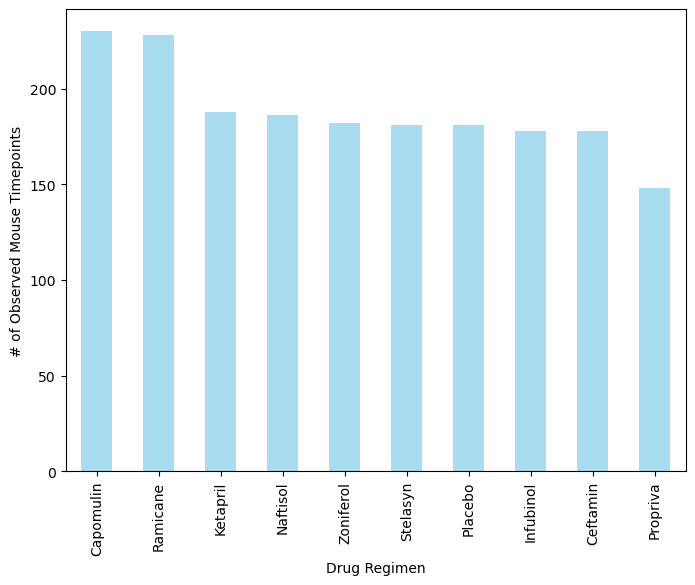

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7, figsize=(8, 6),ylabel='# of Observed Mouse Timepoints',rot=90)

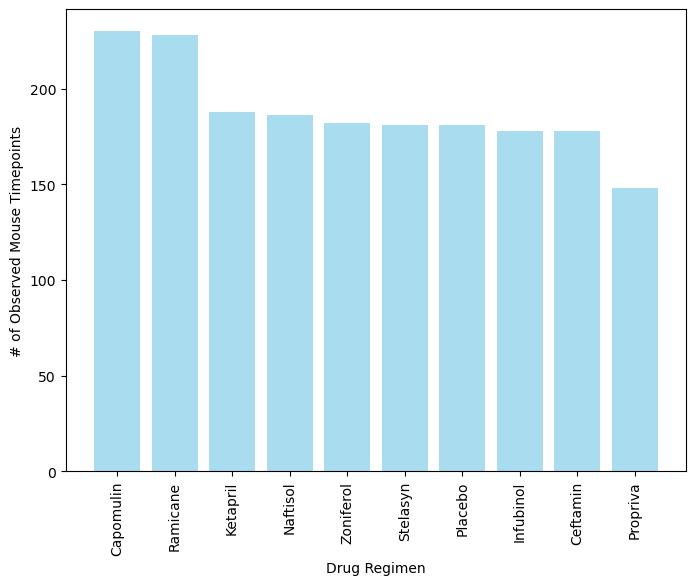

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values
plt.figure(figsize=(8, 6))
plt.bar(regimens, counts, color='skyblue', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

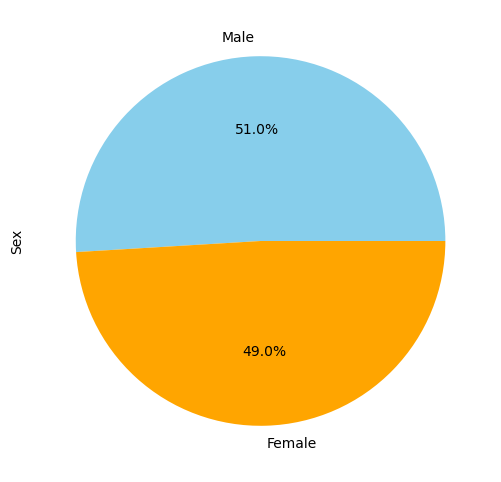

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], figsize=(8, 6),ylabel='Sex')

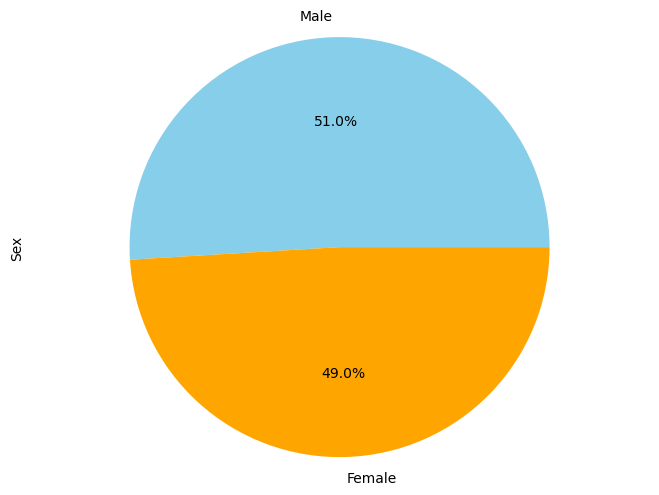

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_counts.index
sizes = gender_counts.values
colors = ['skyblue', 'orange']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint, merged_df, on=['Mouse ID', 'Timepoint'], how='inner')
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatments_of_interest)]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    # Calculate quartiles, IQR, and bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers:{outliers}")

    

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


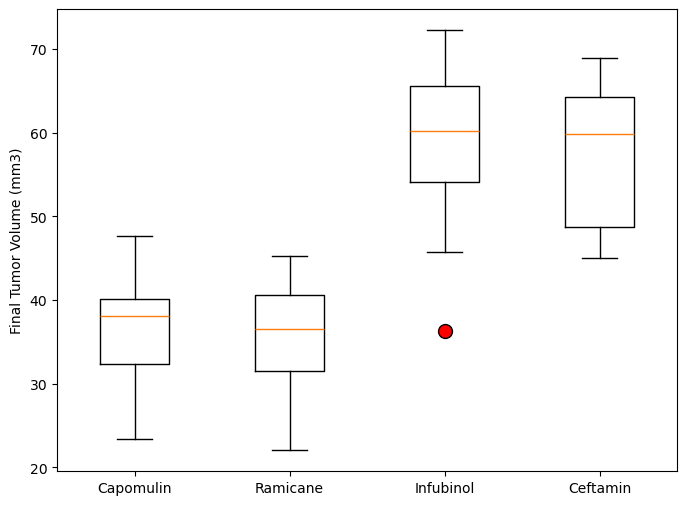

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volume_data, labels=treatments,flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

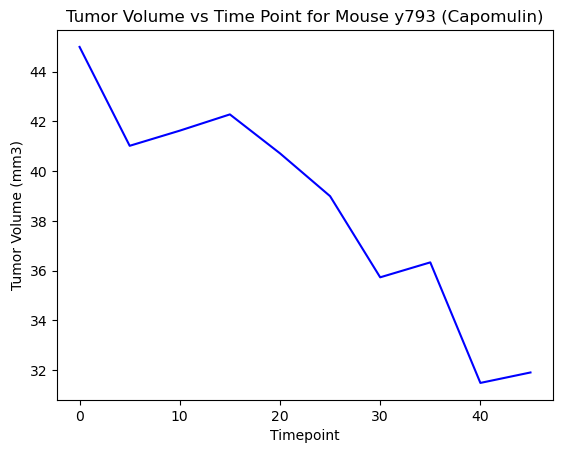

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Select a single mouse that was treated with Capomulin
capomulin_mice = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_mice.sample(1)['Mouse ID'].iloc[0]

# Step 2: Filter the data for that mouse from the Capomulin treatment regimen
mouse_data = capomulin_mice[capomulin_mice['Mouse ID'] == single_mouse]

# Step 3: Plot the tumor volume against the time point for that mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.title(f"Tumor Volume vs Time Point for Mouse {single_mouse} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

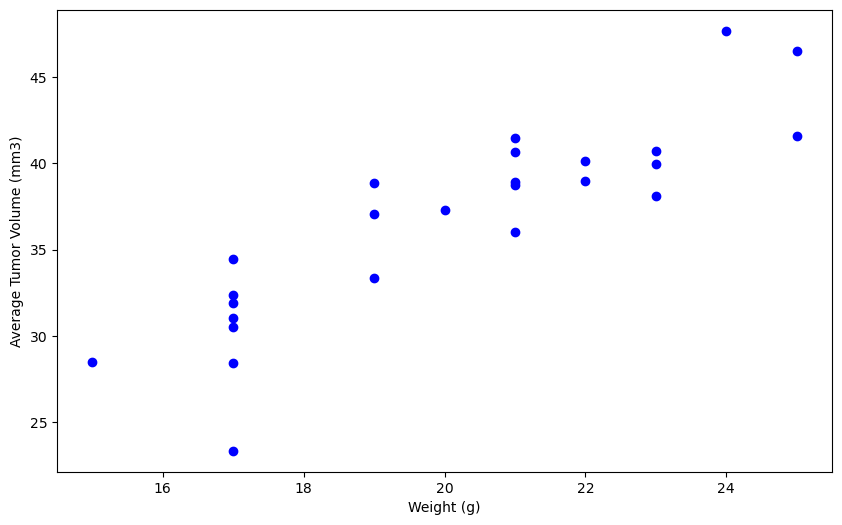

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Group the DataFrame by Mouse ID to calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 2: Merge the resulting DataFrame with the mouse_metadata DataFrame to include the weight information
capomulin_avg_tumor_volume_df = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Step 3: Plot the mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume_df['Weight (g)'], capomulin_avg_tumor_volume_df['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


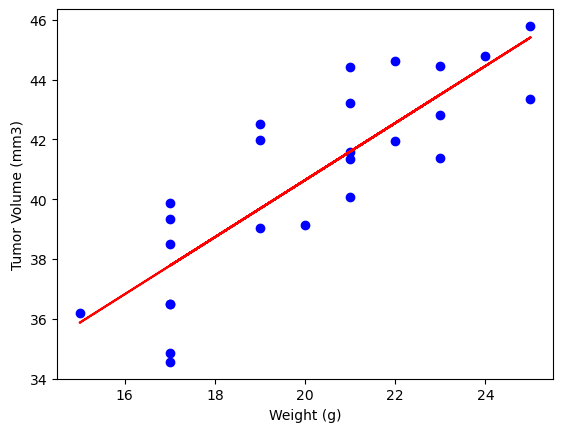

In [18]:
# Calculate the correlation coefficient and a linear regression model 


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_data = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
tumor_volume_data = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


correlation_coefficient = np.corrcoef(weight_data, tumor_volume_data)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression

slope, intercept, r_value, p_value, std_err = linregress(weight_data, tumor_volume_data)

# Step 3: Plot the scatter plot and linear regression line
plt.scatter(weight_data, tumor_volume_data, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(weight_data, slope * weight_data + intercept, color='red', label='Linear Regression')


plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


# Display the plot
plt.show()